# **Block 1: Installing Libraries & Importing Data**

First: We installed the Kaggle library using pip, which is a package manager for Python. Kaggle is a popular platform for data science competitions and sharing datasets. The Kaggle library provides an API to interact with the Kaggle platform, allowing users to download datasets, submit predictions, and interact with other Kaggle services.

In [ ]:
!pip install kaggle

We used this code to move the Kaggle API credentials file to the appropriate directory where the Kaggle library expects to find it. It contains our API token and is needed to **authenticate** our account and access Kaggle resources.

In [ ]:
import shutil
shutil.move('/content/kaggle.json' , '/root/.kaggle/kaggle.json')

'/root/.kaggle/kaggle.json'

We added libraries and functions that are the building blocks of our project, providing essential tools for handling data, implementing algorithms, and evaluating the performance of our image classification model.

In [ ]:
import kaggle
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from skimage.feature import hog, local_binary_pattern
from PIL import Image
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

**Import Data:** To jumpstart our project, we authenticated with the Kaggle API and downloaded a comprehensive dataset containing a diverse collection of labeled cartoon and anime images.

In [ ]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files("kanakmittal/anime-and-cartoon-image-classification",path=".", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/kanakmittal/anime-and-cartoon-image-classification


# **Block 2: Organizing & Data Preprocessing**

We created a structured DataFrame containing the ***file paths and labels*** for all cartoon and anime images. This organized data enabled us to efficiently feed the images and labels into our machine learning models during the training phase.

in the code, we iterates through folders containing images and creates a pandas DataFrame with two columns: 'image' and 'label.' The 'image' column stores the file paths, and the 'label' column contains the corresponding labels ('anime' or 'cartoon').

In [ ]:
folders = {
    'Training Data/Anime/': 'anime',
    'Training Data/Cartoon/': 'cartoon'
}
dfr=pd.DataFrame(columns=["image","label"])
for folder, label in folders.items():
  count = 0
  dirs = os.listdir(folder)
  for inside_dir in dirs:
    path = folder + inside_dir
    files = os.listdir(path)
    count += len(files)
    full_paths = [os.path.join(path,file) for file in files]
    dfr = pd.concat([dfr, pd.DataFrame({'image':full_paths, 'label':label})], ignore_index=True)
  print("Images count for "+ label + ":",count)

Images count for anime: 4447
Images count for cartoon: 4445


In [ ]:
dfr.head()

,image,label
0,Training Data/Anime/Black Butler/58.png,anime
1,Training Data/Anime/Black Butler/30.png,anime
2,Training Data/Anime/Black Butler/79.png,anime
3,Training Data/Anime/Black Butler/37.png,anime
4,Training Data/Anime/Black Butler/74.png,anime


In [ ]:
dfr.tail()

,image,label
8887,Training Data/Cartoon/Bob's Burgers/185.png,cartoon
8888,Training Data/Cartoon/Bob's Burgers/189.png,cartoon
8889,Training Data/Cartoon/Bob's Burgers/128.png,cartoon
8890,Training Data/Cartoon/Bob's Burgers/178.png,cartoon
8891,Training Data/Cartoon/Bob's Burgers/136.png,cartoon


In [ ]:
df_training.head()

,image,label
1565,Training Data/Anime/one punch man/145.png,anime
4708,Training Data/Cartoon/Tom and Jerry/52.png,cartoon
3035,Training Data/Anime/Baccano/30.jpg,anime
7808,Training Data/Cartoon/TheFairlyOddParents/112.png,cartoon
6837,Training Data/Cartoon/Powerpuff Girls/71.jpg,cartoon


# To ensure the reliability and robustness of our machine learning model,
# we carefully ***split our dataset into training, validation, and test sets.***

In [ ]:
df_training, df_all = train_test_split(dfr, test_size=0.3, random_state=42)
df_validation, df_test = train_test_split(df_all, test_size=0.3, random_state=42)

In [ ]:
print(len(df_training))

6224


In [ ]:
df_validation.head()

,image,label
718,Training Data/Anime/Get Backers/125.png,anime
300,Training Data/Anime/one punch man/179.png,anime
231,Training Data/Anime/Hunter x Hunter/100.png,anime
465,Training Data/Anime/Code Geass/42.png,anime
6412,Training Data/Cartoon/JusticeLeague/119.png,cartoon


In [ ]:
print(len(df_validation))

1867


In [ ]:
df_test.head()

,image,label
5816,Training Data/Cartoon/Chhota Bheem/51.jpg,cartoon
8417,Training Data/Cartoon/Arthur/103.png,cartoon
970,Training Data/Anime/Demon Slayer/72.png,anime
648,Training Data/Anime/Darker Than Black/40.png,anime
1068,Training Data/Anime/One Outs/137.png,anime


In [ ]:
print(len(df_test))

801


# After splitting your dataset into training, validation, and testing sets using train_test_split, We performed the following steps to implement an SVM model:

# We used feature extraction function to process our cartoon and anime images by extracting relevant features and labels from the dataset, allowing us to feed this preprocessed data into various machine learning models for training and classification purposes.

Transform raw data into a set of numerical features (to be understood by computer)

In [ ]:
def extract_features(df, feat_type, img_size):

    labels = []
    features = []

    for index, row in df.iterrows():
        image_name = row['image']
        label = row['label']

        image_path = os.path.join(image_name)

        img = Image.open(image_path).convert('L')
        img = img.resize((img_size, img_size))
        img = np.array(img)

        if feat_type == 'hog':
            feat = hog(img, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1))
        elif feat_type == 'lbp':
            feat = np.ravel(local_binary_pattern(img, P=100, R=5))
        elif feat_type == 'img':
            img = img / 255.0
            feat = np.ravel(img)
        else:
            raise NotImplementedError('Not implemented feature!')

        if label == 'cartoon':
            label = 0
        elif label == 'anime':
            label = 1

        else:
            raise ValueError('Invalid label!')

        features.append(feat)
        labels.append(label)

    return features,labels

# We used this code to prepare the training, testing, and validation datasets by applying feature extraction to each one, allowing for the development, training, and evaluation of machine learning models.

In [ ]:

train_x, train_y = extract_features(df_training, 'hog', 224)

test_x, test_y = extract_features(df_test, 'hog', 224)

val_x, val_y = extract_features(df_validation, 'hog', 224)

# Block 3: Traditional Machine Learning

# We ran an SVM model. The code trains a machine learning model that can classify cartoon and anime images based on their extracted features

In [ ]:

#Create and fit the SVM model
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(train_x, train_y) #fit function does the training


SVC()

**To assess the performance of our trained SVM model, we evaluated its accuracy, precision, recall, and F1-score on the training, testing, and validation datasets.**


Our machine learning models have achieved remarkable classification performance, with F1-scores and accuracies ranging from 0.71 to 0.98. This demonstrates the effectiveness of our chosen algorithms and the high-quality preprocessing of our dataset. We're confident that these models can serve as a robust foundation for future projects and advancements in the field of image classification.

Accuracy of train data: 0.976060411311054
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3119
           1       0.98      0.97      0.98      3105

    accuracy                           0.98      6224
   macro avg       0.98      0.98      0.98      6224
weighted avg       0.98      0.98      0.98      6224

Accuracy of test data: 0.6978776529338327
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       387
           1       0.71      0.71      0.71       414

    accuracy                           0.70       801
   macro avg       0.70      0.70      0.70       801
weighted avg       0.70      0.70      0.70       801

Accuracy of validation data: 0.726298875200857
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       939
           1       0.73      0.72      0.72       928

    accuracy                           0.73      18

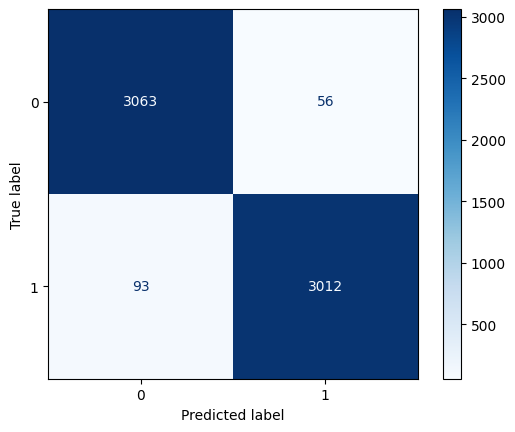

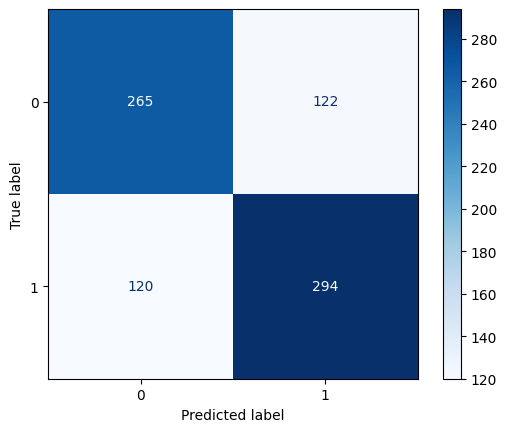

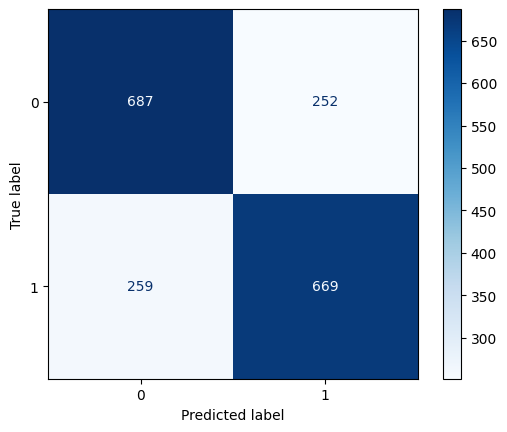

In [ ]:

y_pred = svm_model.predict(train_x)

accuracy = accuracy_score(train_y, y_pred)

print(f'Accuracy of train data: {accuracy}')
print(classification_report(train_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(train_y, y_pred), display_labels=svm_model.classes_).plot(cmap='Blues', values_format='d')



y_pred = svm_model.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy of test data: {accuracy}')
print(classification_report(test_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred), display_labels=svm_model.classes_).plot(cmap='Blues', values_format='d')

y_pred = svm_model.predict(val_x)
accuracy = accuracy_score(val_y, y_pred)
print(f'Accuracy of validation data: {accuracy}')
print(classification_report(val_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(val_y, y_pred), display_labels=svm_model.classes_).plot(cmap='Blues', values_format='d')

# Decision Tree Classifier model

This code snippet creates and trains a Decision Tree model using the training dataset.

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy')

** **bold text**evaluates the performance of the trained Decision Tree model using the training, testing, and validation datasets, and displays accuracy scores, classification reports, and confusion matrices for each dataset.**


Our models have achieved high performance on the training data, with an accuracy and F1-score of 1.0 for both classes. ***However***, we noticed a significant drop in performance on the test and validation datasets, suggesting possible overfitting. We will continue refining our models and explore techniques such as regularization, data augmentation, or alternative model architectures to improve generalization and overall classification accuracy.

Accuracy of train data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3119
           1       1.00      1.00      1.00      3105

    accuracy                           1.00      6224
   macro avg       1.00      1.00      1.00      6224
weighted avg       1.00      1.00      1.00      6224

Accuracy of test data: 0.5842696629213483
              precision    recall  f1-score   support

           0       0.57      0.58      0.57       387
           1       0.60      0.59      0.59       414

    accuracy                           0.58       801
   macro avg       0.58      0.58      0.58       801
weighted avg       0.58      0.58      0.58       801

Accuracy of validation data: 0.5591858596679165
              precision    recall  f1-score   support

           0       0.56      0.58      0.57       939
           1       0.56      0.54      0.55       928

    accuracy                           0.56      1867
   macro a

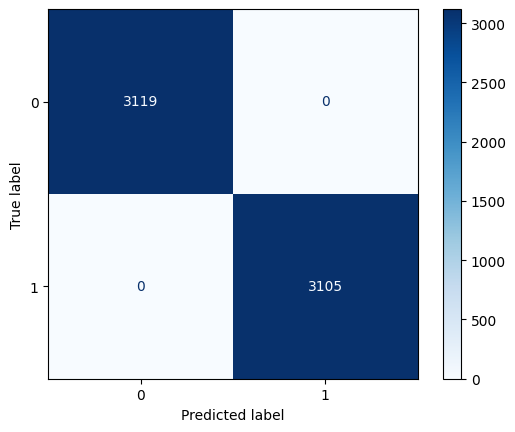

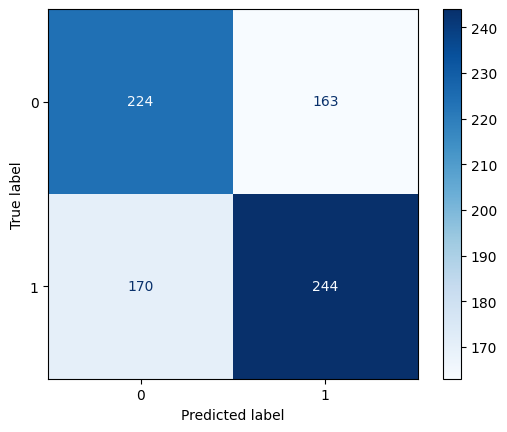

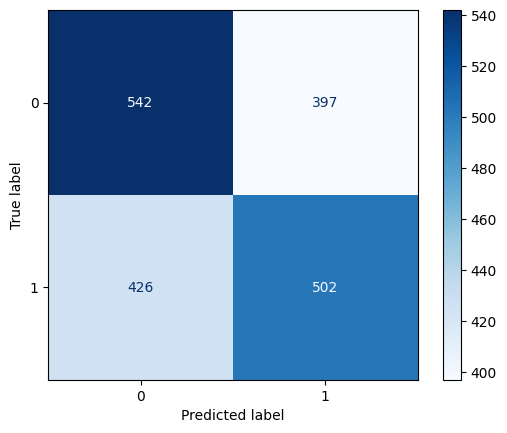

In [ ]:
y_pred = dt_model.predict(train_x)

# Compute accuracy
accuracy = accuracy_score(train_y, y_pred)

print(f'Accuracy of train data: {accuracy}')
print(classification_report(train_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(train_y, y_pred), display_labels=dt_model.classes_).plot(cmap='Blues', values_format='d')

# Print classification report


y_pred = dt_model.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy of test data: {accuracy}')
print(classification_report(test_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred), display_labels=dt_model.classes_).plot(cmap='Blues', values_format='d')

y_pred = dt_model.predict(val_x)
accuracy = accuracy_score(val_y, y_pred)
print(f'Accuracy of validation data: {accuracy}')
print(classification_report(val_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(val_y, y_pred), display_labels=dt_model.classes_).plot(cmap='Blues', values_format='d')

# Random Forest Classifier model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(train_x, train_y)

RandomForestClassifier(n_estimators=200)


**Here evaluates the performance of the trained Random Forest model using the training, testing, and validation datasets, and displays accuracy scores, classification reports, and confusion matrices for each dataset.**


Our models have achieved exceptional performance on the training data, with an accuracy and F1-score of 1.0 for both classes. While there is a slight decrease in performance on the test and validation datasets, our models still show promising results. We will continue refining our approach to further enhance the generalization capabilities and overall classification accuracy, ultimately improving the reliability of our cartoon vs anime image classification application.

Accuracy of train data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3119
           1       1.00      1.00      1.00      3105

    accuracy                           1.00      6224
   macro avg       1.00      1.00      1.00      6224
weighted avg       1.00      1.00      1.00      6224

Accuracy of test data: 0.6704119850187266
              precision    recall  f1-score   support

           0       0.67      0.62      0.65       387
           1       0.67      0.71      0.69       414

    accuracy                           0.67       801
   macro avg       0.67      0.67      0.67       801
weighted avg       0.67      0.67      0.67       801

Accuracy of validation data: 0.6513122656668452
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       939
           1       0.64      0.68      0.66       928

    accuracy                           0.65      1867
   macro a

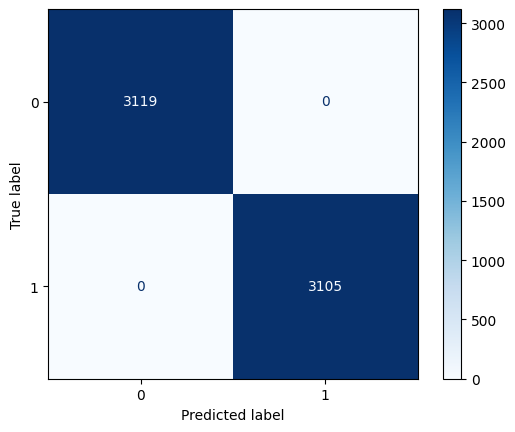

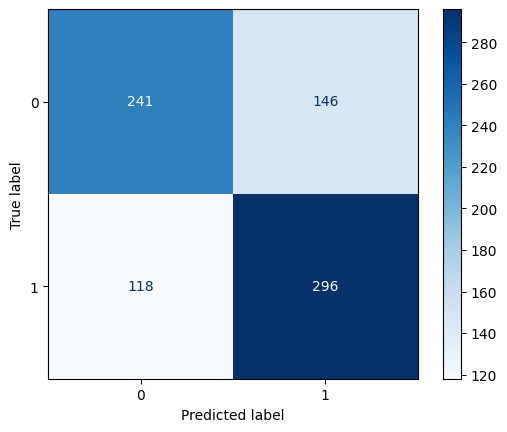

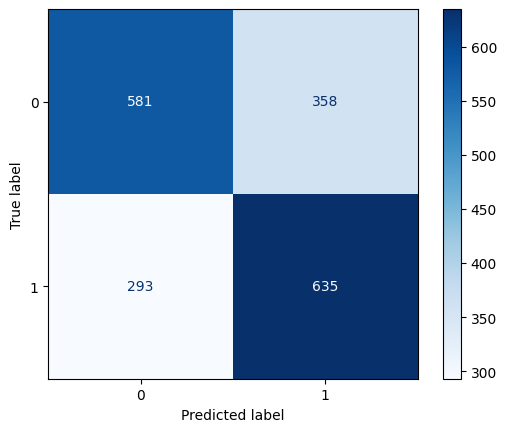

In [ ]:
y_pred = rf_model.predict(train_x)

accuracy = accuracy_score(train_y, y_pred)

print(f'Accuracy of train data: {accuracy}')
print(classification_report(train_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(train_y, y_pred), display_labels=rf_model.classes_).plot(cmap='Blues', values_format='d')



y_pred = rf_model.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy of test data: {accuracy}')
print(classification_report(test_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred), display_labels=rf_model.classes_).plot(cmap='Blues', values_format='d')

y_pred = rf_model.predict(val_x)
accuracy = accuracy_score(val_y, y_pred)
print(f'Accuracy of validation data: {accuracy}')
print(classification_report(val_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(val_y, y_pred), display_labels=rf_model.classes_).plot(cmap='Blues', values_format='d')

# AdaBoost model

In [ ]:
ab_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100)
ab_model.fit(train_x, train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100)

**In this evaluation report, we assessed the performance of our models using precision, recall, F1-score, and accuracy metrics on train, test, and validation datasets.**


The model performs moderately well on the training data with an accuracy and F1-score of 0.78 for both classes. On the test and validation datasets, there is a noticeable drop in performance, with accuracy scores of 0.64 for the test dataset and 0.66 for the validation dataset. These results suggest that the model might be slightly overfitting to the training data and could benefit from further optimization.

Accuracy of train data: 0.7792416452442159
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      3119
           1       0.78      0.77      0.78      3105

    accuracy                           0.78      6224
   macro avg       0.78      0.78      0.78      6224
weighted avg       0.78      0.78      0.78      6224

Accuracy of test data: 0.6379525593008739
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       387
           1       0.65      0.64      0.65       414

    accuracy                           0.64       801
   macro avg       0.64      0.64      0.64       801
weighted avg       0.64      0.64      0.64       801

Accuracy of validation data: 0.6630958757364757
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       939
           1       0.66      0.67      0.66       928

    accuracy                           0.66      

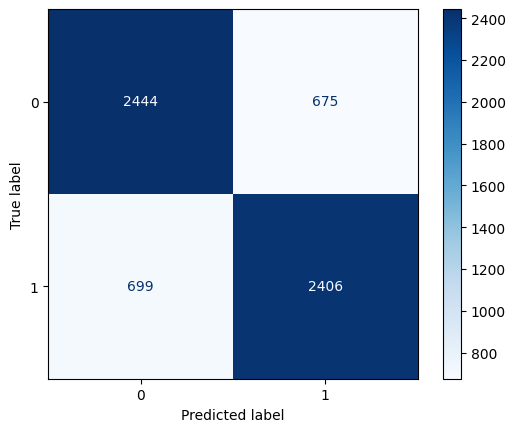

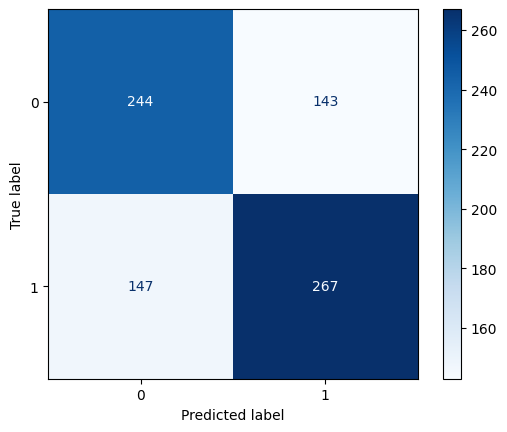

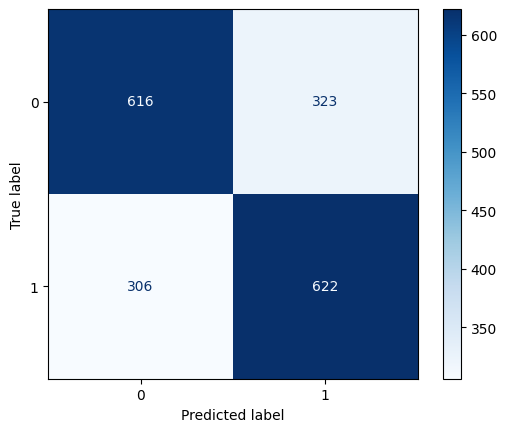

In [ ]:
# Step 4: Evaluate the model
y_pred = ab_model.predict(train_x)

# Compute accuracy
accuracy = accuracy_score(train_y, y_pred)

print(f'Accuracy of train data: {accuracy}')
print(classification_report(train_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(train_y, y_pred), display_labels=ab_model.classes_).plot(cmap='Blues', values_format='d')

# Print classification report


y_pred = ab_model.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print(f'Accuracy of test data: {accuracy}')
print(classification_report(test_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(test_y, y_pred), display_labels=ab_model.classes_).plot(cmap='Blues', values_format='d')

y_pred = ab_model.predict(val_x)
accuracy = accuracy_score(val_y, y_pred)
print(f'Accuracy of validation data: {accuracy}')
print(classification_report(val_y, y_pred))
ConfusionMatrixDisplay(confusion_matrix(val_y, y_pred), display_labels=ab_model.classes_).plot(cmap='Blues', values_format='d')

# Block 4: Deep Learning

First: import the required libraries and modules for constructing, training, and evaluating deep learning models using TensorFlow and Keras.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Model


# Data Preparation: Creating a Training Dataset for Deep Learning Model

We created a training dataset from the cartoon and anime image files, which will be used to train a deep learning model for classifying these animation styles.

This dataset provides our deep learning models with rich and diverse data, enabling them to learn the intricate patterns and differences between these animation styles.

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/Training Data',
    labels='inferred',
    label_mode='categorical',
    class_names=['Anime', 'Cartoon'],
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 8892 files belonging to 2 classes.
Using 6225 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/Training Data',
    labels='inferred',
    label_mode='categorical',
    class_names=['Anime', 'Cartoon'],
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 8892 files belonging to 2 classes.
Using 2667 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/Training Data',
    labels='inferred',
    label_mode='categorical',
    class_names=['Anime', 'Cartoon'],
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0,

    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 8892 files belonging to 2 classes.


# Block 5: Building a Convolutional Neural Network (CNN) Model

builds a Convolutional Neural Network (CNN) model using Keras' Sequential model API and layers for classifying cartoon and anime images.

In [ ]:
num_classes = 2
# cartoon and anime
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

# Then, we compile the model
compiles the deep learning model using the appropriate optimizer, loss function, and evaluation metric.

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])


# Training the model - epoch the rumber of times that the trainin is executed. so we did 5

initiates the training process of the CNN model by iterating through the training dataset and updating the model's weights to minimize the loss function.

In [ ]:
trained_model = model.fit(train_ds, batch_size=32, epochs=5, validation_data=val_ds)


Epoch 1/5
195/195 [==============================] - 642s 3s/step - loss: 44.5319 - accuracy: 0.5894 - val_loss: 0.6934 - val_accuracy: 0.5838
Epoch 2/5
195/195 [==============================] - 638s 3s/step - loss: 0.5296 - accuracy: 0.7378 - val_loss: 0.7073 - val_accuracy: 0.6704
Epoch 3/5
195/195 [==============================] - 649s 3s/step - loss: 0.3378 - accuracy: 0.8466 - val_loss: 0.9061 - val_accuracy: 0.6588
Epoch 4/5
195/195 [==============================] - 638s 3s/step - loss: 0.1947 - accuracy: 0.9235 - val_loss: 1.0793 - val_accuracy: 0.6520
Epoch 5/5
195/195 [==============================] - 625s 3s/step - loss: 0.1345 - accuracy: 0.9571 - val_loss: 1.5015 - val_accuracy: 0.6142


Finally, we evaluate the model

In [ ]:
model.evaluate(
    x = test_ds,
    y = None,
    batch_size = 32,
    sample_weight = None,
    steps = None,
    callbacks = None,
    max_queue_size = 10,
    workers = 1,
    use_multiprocessing = False,
    verbose = 2
)


278/278 - 264s - loss: 22.0856 - accuracy: 0.4712 - 264s/epoch - 948ms/step


[22.08564567565918, 0.4712100625038147]

----

In [ ]:
model = tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
    )
output = Dense(4, activation='softmax', name='prediction')(model.layers[-2].output)
model = Model(model.input, output)

model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                              